Task 5: Гистограмма
На этот раз вместо средних значений мы будем использовать абсолютные значения числа коммитов и сравним их в рабочие и выходные дни.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
from sqlite3 import connect

In [ ]:
from google.colab import drive   
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [ ]:
dataset4= pd.read_sql('''
select timestamp,date(timestamp) date
from checker
where uid like '%user%' and status = 'ready' 
''', con,parse_dates=['timestamp'])
dataset4

,timestamp,date
0,2020-04-17 05:19:02.744528,2020-04-17
1,2020-04-17 05:22:45.549397,2020-04-17
2,2020-04-17 05:34:24.422370,2020-04-17
3,2020-04-17 05:43:27.773992,2020-04-17
4,2020-04-17 05:46:32.275104,2020-04-17
...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21
1682,2020-05-21 20:18:54.487900,2020-05-21
1683,2020-05-21 20:19:06.872761,2020-05-21
1684,2020-05-21 20:22:41.877806,2020-05-21


In [ ]:
dataset4['hours'] =dataset4.timestamp.dt.hour
dataset4['weekday'] =dataset4.timestamp.dt.weekday
dataset4


,timestamp,date,hours,weekday
0,2020-04-17 05:19:02.744528,2020-04-17,5,4
1,2020-04-17 05:22:45.549397,2020-04-17,5,4
2,2020-04-17 05:34:24.422370,2020-04-17,5,4
3,2020-04-17 05:43:27.773992,2020-04-17,5,4
4,2020-04-17 05:46:32.275104,2020-04-17,5,4
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21,20,3
1682,2020-05-21 20:18:54.487900,2020-05-21,20,3
1683,2020-05-21 20:19:06.872761,2020-05-21,20,3
1684,2020-05-21 20:22:41.877806,2020-05-21,20,3


In [ ]:
dataset4_rab=dataset4.query('weekday in (0,1,2,3,4)')
dataset4_rab.drop(columns='weekday', axis=1, inplace=True)
dataset4_rab.drop(columns='date', axis=1, inplace=True)
dataset4_rab.drop(columns='timestamp', axis=1, inplace=True)
dataset4_rab

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,hours
0,5
1,5
2,5
3,5
4,5
...,...
1681,20
1682,20
1683,20
1684,20


In [ ]:
dataset4_weekend=dataset4.query('weekday in (5,6)')
dataset4_weekend.drop(columns='weekday', axis=1, inplace=True)
dataset4_weekend.drop(columns='date', axis=1, inplace=True)
dataset4_weekend.drop(columns='timestamp', axis=1, inplace=True)
dataset4_weekend

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,hours
13,7
14,13
15,13
16,13
17,13
...,...
1611,21
1612,22
1613,22
1614,22


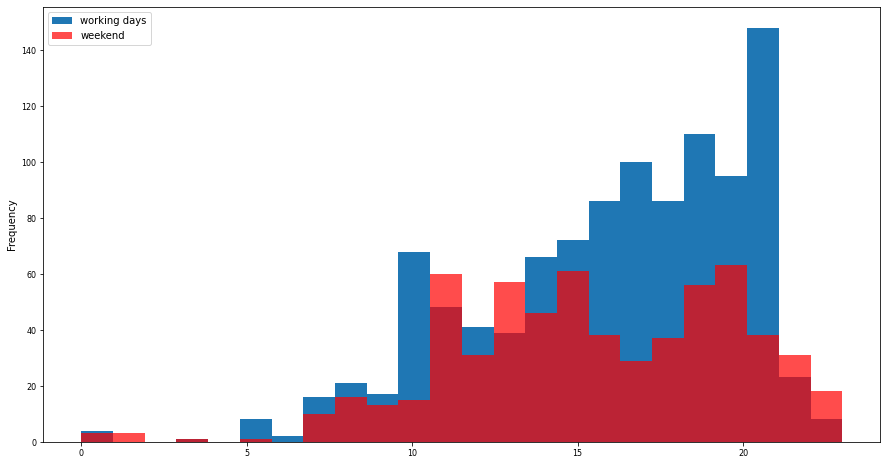

In [ ]:
dataset4_weekend.plot(
                      kind='hist',
                      bins=24,
                      fontsize=8,
                      figsize=(15, 8),
                      alpha=0.7,
                      xlabel='date',
                      color=['red',"blue"],
                      ax=dataset4_rab.plot.hist(bins=24)
)
plt.legend(['working days','weekend'],loc='upper left')
plt.show()

In [ ]:
#@markdown **Существуют ли часы, когда общее количество коммитов было выше в выходные дни, чем в рабочие?**

Ответ: 11;13;22;23

In [ ]:
con.close()